This notebook is made to clear the fundamentals of data augmentation.

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.16.1
Num GPUs Available: 0


In [3]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:

list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [7]:

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

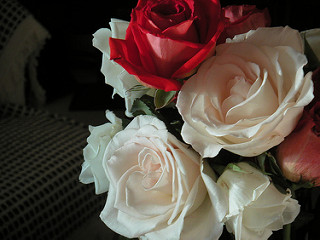

In [9]:

PIL.Image.open(str(roses[1]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

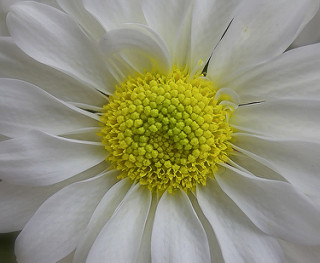

In [11]:
PIL.Image.open(str(flowers_images_dict['daisy'][0]))

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:

img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [14]:
img.shape

(240, 179, 3)

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:

X = np.array(X)
y = np.array(y)

In [19]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [22]:
num_classes = 5

model = Sequential([
  layers.Conv2D(10, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(30, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(50, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10) 


Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 225ms/step - accuracy: 0.4775 - loss: 1.2624
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 228ms/step - accuracy: 0.5996 - loss: 1.0117
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 221ms/step - accuracy: 0.6940 - loss: 0.8083
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 224ms/step - accuracy: 0.7874 - loss: 0.5873
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 226ms/step - accuracy: 0.8761 - loss: 0.3595
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 212ms/step - accuracy: 0.9368 - loss: 0.2037
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 211ms/step - accuracy: 0.9604 - loss: 0.1359
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 212ms/step - accuracy: 0.9793 - loss: 0.0799
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 209ms/step - accuracy: 0.9775 - loss: 0.0838
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 211ms/step - accuracy: 0.9895 - loss: 0.0443


In [23]:
model.save("unAugmented_cnn.keras")

In [24]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.6231 - loss: 2.0204


[2.020402669906616, 0.6230936646461487]